In [1]:
import pandas as pd


df = pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [2]:
import torch


torch.manual_seed(42)

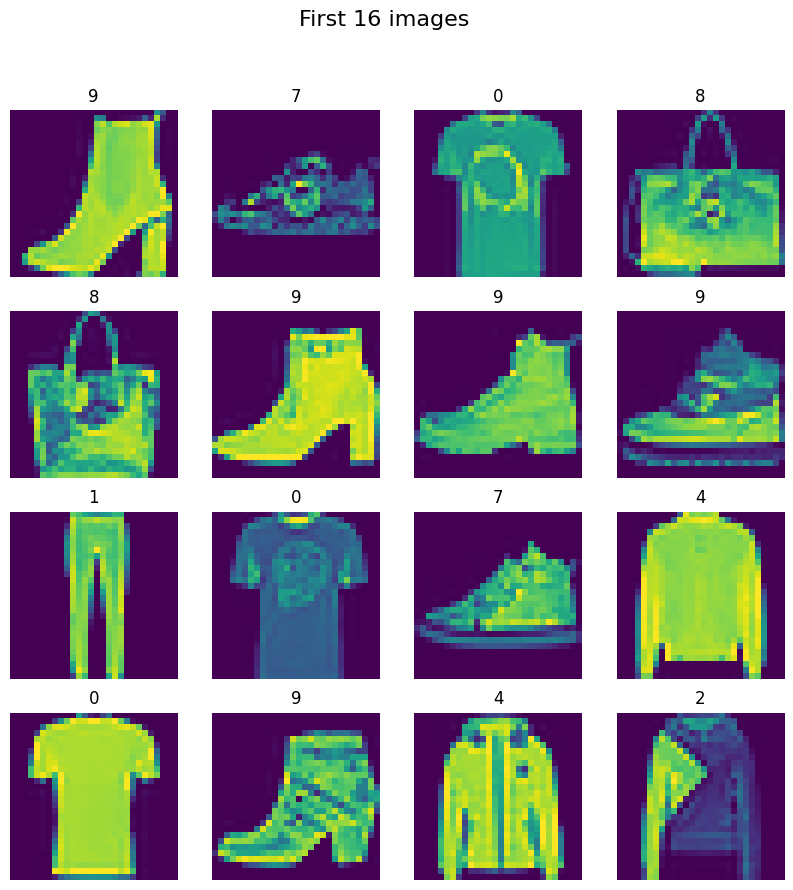

In [3]:
from matplotlib import pyplot as plt


fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(df.iloc[i, 0])
    
plt.show()

In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# If removed .values from this line it will return a Pandas DataFrame instead of a NumPy array.

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [7]:
train_dataset = CustomDataset(X_train, y_train)
len(train_dataset), train_dataset[0]

(4800,
 (tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         

In [8]:
test_dataset = CustomDataset(X_test, y_test)

In [9]:
from torch.utils.data import DataLoader


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
import torch.nn as nn


class NN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [11]:
epochs = 100
learning_rate = 0.1

In [12]:
model = NN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
for epoch in range(epochs):
    total_loss = 0
    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 1.3216
Epoch: 2, Loss: 0.7793
Epoch: 3, Loss: 0.6428
Epoch: 4, Loss: 0.5752
Epoch: 5, Loss: 0.5282
Epoch: 6, Loss: 0.4953
Epoch: 7, Loss: 0.4602
Epoch: 8, Loss: 0.4359
Epoch: 9, Loss: 0.4183
Epoch: 10, Loss: 0.3976
Epoch: 11, Loss: 0.3849
Epoch: 12, Loss: 0.3725
Epoch: 13, Loss: 0.3467
Epoch: 14, Loss: 0.3472
Epoch: 15, Loss: 0.3161
Epoch: 16, Loss: 0.3120
Epoch: 17, Loss: 0.2953
Epoch: 18, Loss: 0.2858
Epoch: 19, Loss: 0.2745
Epoch: 20, Loss: 0.2651
Epoch: 21, Loss: 0.2521
Epoch: 22, Loss: 0.2439
Epoch: 23, Loss: 0.2426
Epoch: 24, Loss: 0.2242
Epoch: 25, Loss: 0.2249
Epoch: 26, Loss: 0.2133
Epoch: 27, Loss: 0.2180
Epoch: 28, Loss: 0.2069
Epoch: 29, Loss: 0.1849
Epoch: 30, Loss: 0.1876
Epoch: 31, Loss: 0.1890
Epoch: 32, Loss: 0.1890
Epoch: 33, Loss: 0.1781
Epoch: 34, Loss: 0.1740
Epoch: 35, Loss: 0.1609
Epoch: 36, Loss: 0.1723
Epoch: 37, Loss: 0.1492
Epoch: 38, Loss: 0.1508
Epoch: 39, Loss: 0.1500
Epoch: 40, Loss: 0.1315
Epoch: 41, Loss: 0.1388
Epoch: 42, Loss: 0.1367
E

In [14]:
model.eval()

NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [17]:
total = correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        # print(predicted, batch_labels)
        total += batch_labels.shape[0]
        correct += (predicted == batch_labels).sum().item()
    print(correct/total)

0.8391666666666666
